# Qiskit Workshop Assignment
## PC5228 Quantum Information and Computation

Course Instructor: Prof. Dagomir Kaszlikowski

Workshop Instructor: Junye Huang

# Instructions : 


Qiskit assignment questions are different from the other tutorial or assignment questions encountered during the course PC5228. This assignment has 2 questions. In question (1), we will learn how to implement the teleportation protocol learnt in the class on quantum simulator and actual quantum computer.  In question (2), we implement Grover's algorithm and how it can be used to solve unstructured search problem both on quantum simulator and actual quantum computer. In both the questions, partial solutions are provided and students are expected to complete the solutions as part of assignment. Students must not modify anything other than the places where you see: "<font color='orange'>Please insert code in the cell below</font>" You must complete your code and submit the entire jupyter notebook to LumiNUS. The assignment will be due by 11:59 pm, May 6, 2020 (Wednesday). 

# Resources : 

- Youtube Video Series on Qiskit : https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY 

- Qiskit textbook: https://qiskit.org/textbook/preface.html

- Instructions to install qiskit on local machine : https://qiskit.org/documentation/install.html 

- IBM Quantum Experience to use Qiskit on cloud : https://quantum-computing.ibm.com/ 

- Workshop recording : The recording of the workshop can be found in this link : https://ibm.webex.com/recordingservice/sites/ibm/recording/playback/e19c576915494631ab96c85444ba0c77 . The password is cSwaCB2g. You can view it online or download.
 
- Qiskit Slack to post any doubts regarding the assignment or qiskit in general. Join Qiskit Slack workspaceYou can join Qiskit Slack workspace using this invitation link: https://join.slack.com/t/qiskit/shared_invite/enQtODQ2NTIyOTgwMTQ3LTI0NzM2NzkzZjJhNDgzZjY5MTQzNDY3MGNiZGQzNTNkZTE4Nzg1MjMwMmFjY2UwZTgyNDlmYWQwYmZjMjE1ZTM Once you joined, please direct message (@Junye Huang). Junye will add you to the private slack channel created for the CS4268 course. 
 


# Accessing Notebook via IBM Quantum Experience : 


1) Open IBM Quantum Experience using the link : https://quantum-computing.ibm.com/ .

2) SignIn to IBM Quantum Experience using email-id and password registered.

3) Click on Menu --> Qiskit Notebooks.

4) Click on Import and Select downloaded Qiskit_Coding-Assignment.ipynb file. 

5) Complete the assignment and save the file as StudentID.ipynb.

6) Upload the saved file to LumiNUS.


## Questions

1. [Quantum Teleportation Question ](#qtel) 
2. [Grovers Algorithm Question](#qgrover)




# 1 . Quantum Teleportation  - 10 points <a id='qtel'></a>




## Contents

1. [Overview](#overview) 
2. [Preparing a GHZ state and obtain its measurement statistics](#how1)  
    2.1 [Run on statevector simulator](#testing1)   
    2.2 [Run on QASM simulator](#testing2)  
3. [The Quantum Teleportation Protocol](#how)       
    3.1 [Simulating the Teleportation Protocol using the QASM Simulator](#simulating)      
    3.2 [Teleportation on a Real Quantum Computer](#real_qc)    
      
4. [References](#references)



## 1. Overview <a id='overview'></a>


In the teleportation protocol, Alice sends a single qubit state to Bob using Bell pair which is shared between Alice and Bob. In this assignment, we will show that the teleportation protocol also preserves entanglement. That is, suppose Alice and Charlie share a pure state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$ which is entangled. Charlie holds the first 2 qubits and Alice holds the 3rd qubit of $\vert\psi\rangle_{CA_1}$. Alice also shares the Bell state  $\vert\phi\rangle_{A_2B} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$  with Bob, where
Alice holds $A_2$, Bob holds $B$. Now Alice and Bob perform the teleportation protocol to send the
state in Alice's register $A_1$ to Bob, using their shared Bell state in $\vert\phi\rangle_{A_2B}$. Then we Show that after the teleportation protocol, Charlie and Bob share the state $\vert\psi\rangle_{CB} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on a real quantum computer.








In [1]:
# Do the necessary imports
import numpy as np
from qiskit import *      # importing qiskit library 
from qiskit.visualization import * #for visualization of measurement statistics
import qiskit.tools.jupyter       # import handy jupyter tools for viewing backend details and monitor job status

## 2. Preparing a GHZ state and obtain its measurement statistics <a id='how1'></a>
We create GHZ state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$ in qubits q_0, q_1, q_2 in this step. Let us say q_0, q_1 are with Charlie and q_2 is with Alice. We intend to perform quantum teleportation protocol and send qubit q_2 from Alice to Bob.

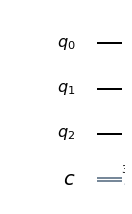

In [2]:
qc_ghz = QuantumCircuit(3,3)
qc_ghz.draw(output='mpl')


## <font color='orange'>Please insert code in the cell below (3 points) </font>

In [3]:
# Creating the following circuit to prepare GHZ state in qubits q_0, q_1, q_2 :
##       ┌───┐          
#q_0: |0>┤ H ├──■────■──
 #       └───┘┌─┴─┐  │  
#q_1: |0>─────┤ X ├──┼──
#             └───┘┌─┴─┐
#q_2: |0>──────────┤ X ├
#                  └───┘

 #c_0: 0 ═══════════════
 #                      
# c_1: 0 ═══════════════
#                       
# c_2: 0 ═══════════════
                       
# (Please insert your code below) :  (3 points)

 # Insert your code to perform hadamard on qubit 0
 # Insert your code to perform cnot gate on qubit 1 with control on qubit 0.
 # Insert your code to perform cnot gate on qubit 2 with control on qubit 0.

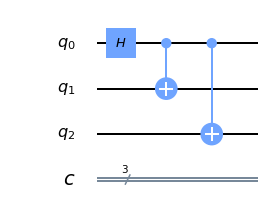

In [4]:
qc_ghz.draw(output='mpl')

In [5]:
#At this point, you should see the following circuit diagram :
#   
##       ┌───┐          
#q_0: |0>┤ H ├──■────■──
 #       └───┘┌─┴─┐  │  
#q_1: |0>─────┤ X ├──┼──
#             └───┘┌─┴─┐
#q_2: |0>──────────┤ X ├
#                  └───┘

 #c_0: 0 ═══════════════
 #                      
# c_1: 0 ═══════════════
#                       
# c_2: 0 ═══════════════

### 2.1 Run on statevector simulator <a id='testing1'></a>
We created GHZ state in qubits q_0, q_1, q_2. Now, we simulate the quantum circuit using 'statevector_simulator' and see the density matrix of the output state

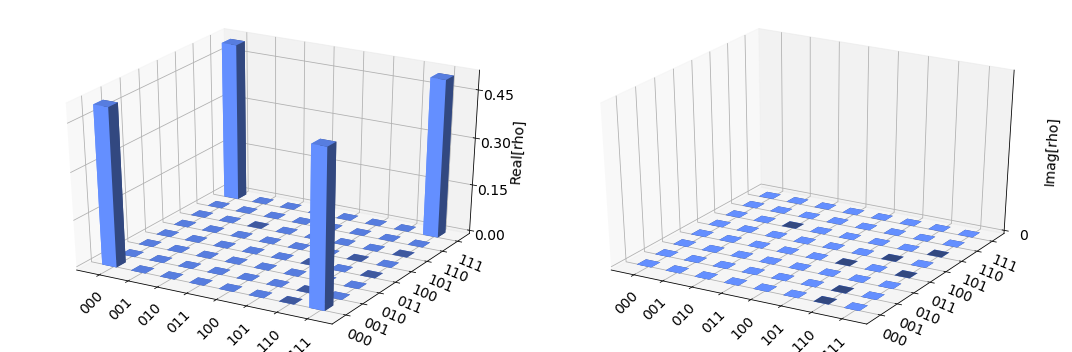

In [6]:
statevector_simulator = Aer.get_backend('statevector_simulator')
result = execute(qc_ghz, statevector_simulator).result()
statevector = result.get_statevector()
plot_state_city(statevector)

### 2.2 Run on QASM simulator <a id='testing2'></a>
Now, we simulate the quantum circuit using 'QASM  simulator'. 

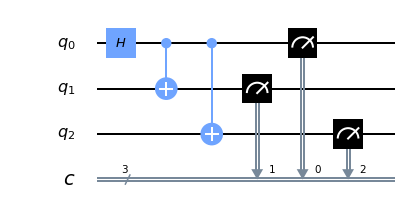

In [7]:
# in order to run on QASM simulator, you first need to measure the qubits
qc_ghz.measure([0,1,2],[0,1,2])  # command to measure qubits q_0,q_1,q_2 and store the results in registers c_0, c_1, c_2.
qc_ghz.draw(output='mpl')   

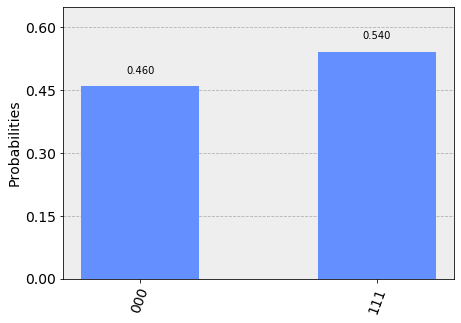

In [8]:
#  Code to run the quantum circuit using QASM simulator using shot number and plot the histogram of counts
# 1: We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.
# 2: We execute the quantum circuit 'qc_ghz' using QASM simulator backend, with shots=1000 and store the results in a variable called 'result'.
# 3: get shot counts from vaiable 'result'
# 4: plot histogram of counts

qasm_simulator = Aer.get_backend('qasm_simulator')        
result = execute(qc_ghz, qasm_simulator, shots=1000).result() 
counts = result.get_counts()                             
plot_histogram(counts)                                   


#At this point, you should see the histogram plot with 000 - close to 0.5 and 111- close to 0.5. 


## 3. The Quantum Teleportation Protocol <a id='how'></a>

We prepare a pure state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. Charlie holds the first 2 qubits and Alice holds the 3rd qubit of $\vert\psi\rangle_{CA_1}$. We also prepare the Bell state  $\vert\phi\rangle_{A_2B} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$, where
Alice holds $A_2$, Bob holds $B$. Now Alice and Bob perform the teleportation protocol to send the
state in Alice's register $A_1$ to Bob, using their shared Bell state in $\vert\phi\rangle_{A_2B}$. Then we Show that after the teleportation protocol, Charlie and Bob share the state $\vert\psi\rangle_{CB} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on a real quantum computer.




In [9]:

qc_teleport = QuantumCircuit(5, 3)

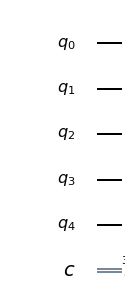

In [10]:

qc_teleport.draw(output='mpl')

#### Step 1
We use the below function to create GHZ state 


In [11]:
def create_ghz(qc, a, b, c): # function to create quantum circuit to prepare ghz state.
    qc.h(a)                  # applies hadamard on qubit specified by a
    qc.cx(a,b)               # applies cnot on qubit specified by b with control on qubit specified by a
    qc.cx(a,c)               # applies cnot on qubit specified by c with control on qubit specified by a


## <font color='orange'>Please insert code in the cell below (3 points)</font>

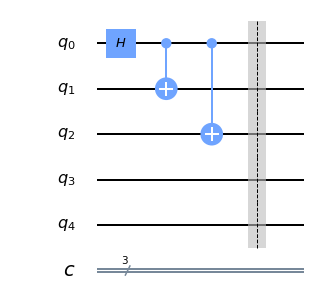

In [12]:
# Initialize state in qubits 0,1,2 to GHZ state.
# Qubits q_0, q_1 are with charlie and q_2 is with Alice
# Alice send qubit q_2 to Bob using Teleportation.


# (Please insert your code below) :      (3 points)
    
 # insert your code to create a GHZ state in qubit 0, qubit 1 and qubit 2 #
qc_teleport.barrier()
qc_teleport.draw(output='mpl')

In [13]:
#At this point, you should see the following circuit diagram : 
#   
 #   ┌───┐           ░ 
# |0>┤ H ├──■────■───░─
 #   └───┘┌─┴─┐  │   ░ 
# |0>─────┤ X ├──┼───░─
#         └───┘┌─┴─┐ ░ 
# |0>──────────┤ X ├─░─
#              └───┘ ░ 
# |0>────────────────░─
#                    ░ 
# |0>────────────────░─
#                    ░ 
# 0 ══════════════════
                         
# 0 ══════════════════
#                          
# 0 c══════════════════
#
# 0 c══════════════════
#
# 0 c══════════════════

#### Step 2
We create an entangled pair of qubits (Bell pair) and gives one to Bob and one to Alice. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis. 

In [14]:
def create_bell(qc, a, b):  # function to create quantum circuit to prepare bell state to be used in teleportation protocol.
    qc.h(a)                  # applies hadamard on qubit specified by a
    qc.cx(a,b)               # applies cnot on qubit specified by b with control on qubit specified by a
    

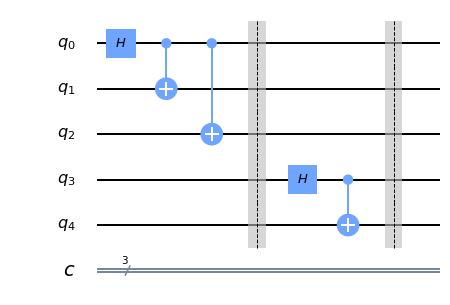

In [15]:
# Now let us begin the teleportation protocol
create_bell(qc_teleport,3,4)  # creates bell pair that is used in teleportation protocol between Alice and Bob.
# q3 is with Alice and q4 is with Bob.
qc_teleport.barrier()
qc_teleport.draw(output='mpl')


In [16]:
#At this point, you should see the following circuit diagram : 
#   
#    ┌───┐           ░            ░ 
# |0>┤ H ├──■────■───░────────────░─
#    └───┘┌─┴─┐  │   ░            ░ 
# |0>─────┤ X ├──┼───░────────────░─
#         └───┘┌─┴─┐ ░            ░ 
# |0>──────────┤ X ├─░────────────░─
#              └───┘ ░ ┌───┐      ░ 
# |0>────────────────░─┤ H ├──■───░─
#                    ░ └───┘┌─┴─┐ ░ 
# |0>────────────────░──────┤ X ├─░─
#                    ░      └───┘ ░ 
# 0 ═══════════════════════════════
 #                                      
# 0 ═══════════════════════════════
 #                                      
# 0 ═══════════════════════════════
#
# 0 ═══════════════════════════════
#
# 0 ═══════════════════════════════

#### Step 3

Alice operations in teleportation

In [17]:
# We use the below function to apply Alice gates in teleportation protocol

In [18]:
def alice_gates(qc, c, d): # function to apply Alice gates in teleportation protocol
    qc.cx(c, d)            # applies cnot on qubit specified by d with control on qubit specified by c
    qc.h(c)                # applies hadamard on qubit specified by c

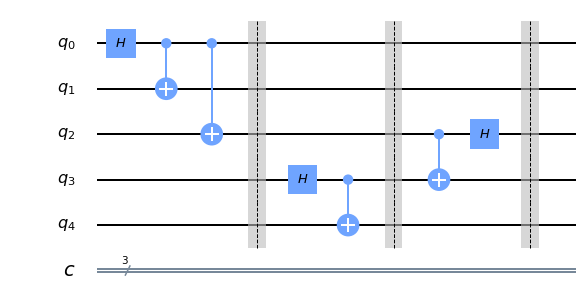

In [19]:
alice_gates(qc_teleport,2,3)  # invoke function to apply Alice gates in teleportation protocol to qubits 2,3 (q2, q3)
qc_teleport.barrier()
qc_teleport.draw(output='mpl')

In [20]:
#At this point, you should see the following circuit diagram : 
#   
#|0>┤ H ├──■────■───░────────────░────────────░─
#   └───┘┌─┴─┐  │   ░            ░            ░ 
#|0>─────┤ X ├──┼───░────────────░────────────░─
#        └───┘┌─┴─┐ ░            ░      ┌───┐ ░ 
#|0>──────────┤ X ├─░────────────░───■──┤ H ├─░─
 #            └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
#|0>────────────────░─┤ H ├──■───░─┤ X ├──────░─
#                   ░ └───┘┌─┴─┐ ░ └───┘      ░ 
#|0>────────────────░──────┤ X ├─░────────────░─
#                   ░      └───┘ ░            ░ 
# 0 ════════════════════════════════════════════
   #                                                 
# 0 ════════════════════════════════════════════
  #                                                  
# 0 ════════════════════════════════════════════
#
# 0 ════════════════════════════════════════════
#
# 0 ════════════════════════════════════════════

#### Step 4

Alice measures his qubits in computational basis and sends the classical outcomes to Bob

In [21]:
# We use the below function that measures and sends classical bits to Bob in teleportation protocol

In [22]:
def measure_and_send(qc, c, d):  # function that measures and sends classical bits to Bob in teleportation protocol
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.measure(c,0)
    qc.measure(d,1)

In [23]:
#measure_and_send(qc_teleport,2,3)   # invoke function to apply Alice gates in teleportation protocol to qubits 2,3 (q2, q3)
#qc_teleport.barrier()
#qc_teleport.draw('mpl')

Ideally according to teleportation protocol, we should be measuring the Alice registers and send the outcomes to Bob. But since the IBM quantum computers currently do not support instructions after measurements, meaning we cannot run the quantum teleportation in its current form on real hardware. Fortunately, this does not limit our ability to perform any computations due to the _deferred measurement principle_ [1]. The principle states that any measurement can be postponed until the end of the circuit, i.e. we can move all the measurements to the end, and we should see the same results.


We will defer measuring in step (4) and instead apply Bob's operation conditioned on alices register instead. 

**Step 5**: Bob, who already has the qubit $q_4$, then applies the following gates depending on the state of the Alice register:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate


In [24]:
# We use the below function to apply Bob gates in teleportation protocol after receiving classical bits from Alice.
def bob_gates(qc, a, b, c): # function to apply Bob gates in teleportation protocol.
    qc.cx(b, c)            # applies cX on qubit specified by c with control on qubit specified by b
    qc.cz(a, c)            # applies cZ on qubit specified by c with control on qubit specified by a

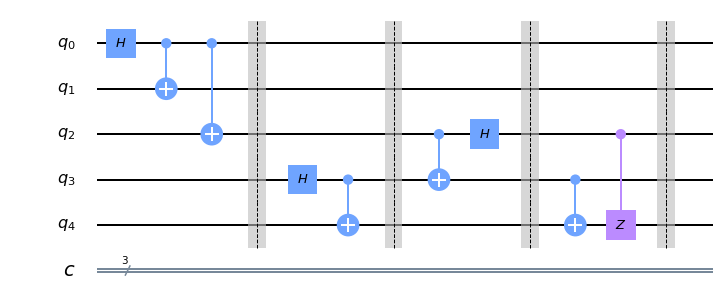

In [25]:
# Let's apply this to our circuit:
bob_gates(qc_teleport, 2, 3, 4)
qc_teleport.barrier() # Use barrier to separate steps
qc_teleport.draw(output='mpl')

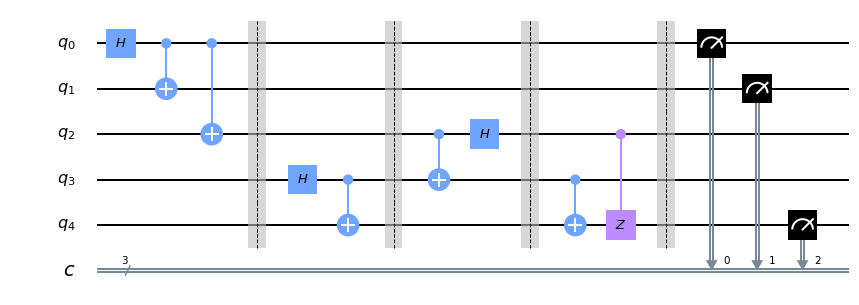

In [26]:
# See the results, we only care about the state of qubit 0,1 (Charlie registers) and qubit 4 (q_2 is teleported to q_4) 
qc_teleport.measure([0,1,4],[0,1,2])
qc_teleport.draw(output='mpl')

And voila! At the end of this protocol, Alice's qubit has now teleported to Bob.

## 3.1 Simulating the Teleportation Protocol using the QASM Simulator <a id='simulating'></a>

## <font color='orange'>Please insert code in the cell below (4 points)</font>

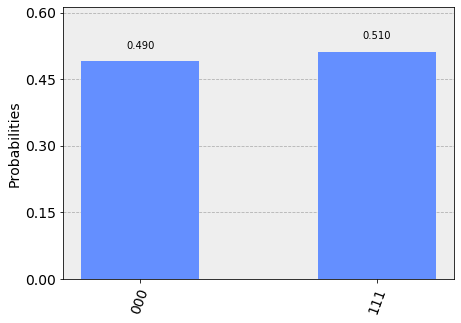

In [27]:
# Code to run the quantum circuit using QASM simulator using shot number and plot the histogram of counts
# 1: We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.
# 2: We execute the quantum circuit 'qc_teleport' using QASM simulator backend, with shots=1000 and store the results in a variable called 'result'.
# 3: get shot counts from vaiable 'result'
# 4: plot histogram of counts

# (Please insert your code below) :   (4 points)

 # Insert your code to get 'qasm_simulator' backend.#
 # Insert your code to execute the quantum circuit 'qc_teleport' using 'qasm_simulator' backend, with shots=1000 and store the results in a variable called 'result'.#
   # Insert your code to get shot counts from job 'result'.#
   # Insert your code to plot histogram of shot counts. #



## 3.2 Teleportation on a Real Quantum Computer <a id='real_qc'></a>

### IBM hardware and Deferred Measurement <a id='deferred-measurement'></a>

The IBM quantum computers currently do not support instructions after measurements, meaning we cannot run the quantum teleportation in its current form on real hardware. Fortunately, this does not limit our ability to perform any computations due to the _deferred measurement principle_ [1]. The principle states that any measurement can be postponed until the end of the circuit, i.e. we can move all the measurements to the end, and we should see the same results.


In this example, the early measurement in quantum teleportation would have allowed us to transmit a qubit state without a direct quantum communication channel. While moving the gates allows us to demonstrate the "teleportation" circuit on real hardware, it should be noted that the benefit of the teleportation process (transferring quantum states via classical channels) is lost.


In [28]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [29]:
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitor job status

%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='610px', min_width='610px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [30]:
# get the least-busy backend at IBM Quantum Experience
from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>

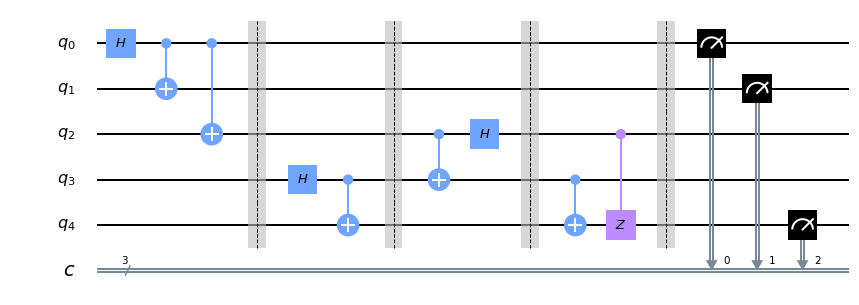

In [31]:
qc_teleport.draw(output='mpl')

In [32]:
job_exp = execute(qc_teleport, device, shots=1000)

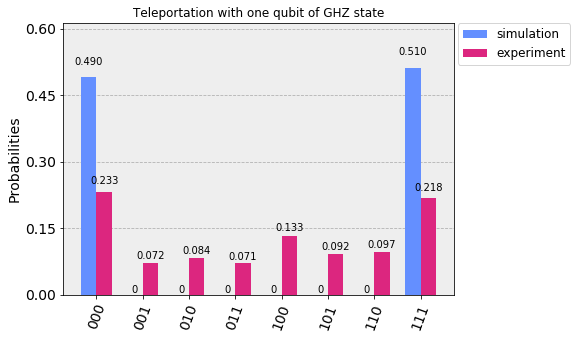

In [33]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts()
figure = plot_histogram([counts, counts_exp], 
                        title='Teleportation with one qubit of GHZ state', legend=['simulation', 'experiment'])
figure
# wait for a while (around 3-5 mins) until the job is run on quantum computer. 

In [34]:
# Notice that the measurement statistics of qubits 0,1,4 (q_2 is teleported to q_4) are the same as
# measurement statistics of GHZ state.

In [35]:
# adjust figure size so that the legend won't be cutoff after export
figure.subplots_adjust(right=0.75)
figure.savefig(fname='Teleportation with one qubit of GHZ state.pdf', format='pdf')

In [36]:
%qiskit_disable_job_watcher

## 6. References <a id='references'></a>
[1] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

[2] Qiskit textbook chapter on quantum teleporation: https://qiskit.org/textbook/ch-algorithms/teleportation.html